##### 계단함수: 0보다 크면 1, 작으면 0

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11748\4122878844.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


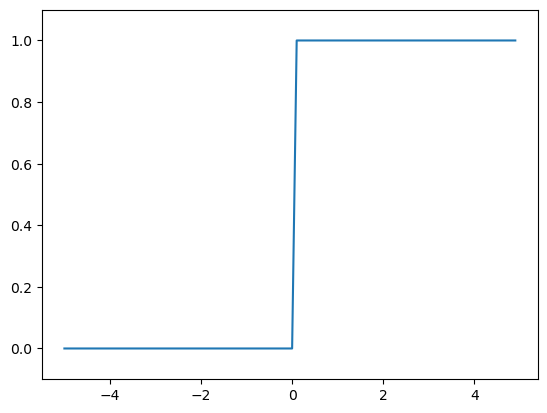

In [1]:
import numpy as np
import matplotlib.pylab as plt
def step_function(x):
    return np.array(x > 0, dtype=np.int) #정수형
X = np.arange(-5.0, 5.0, 0.1)
y = step_function(X)
plt.plot(X, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

##### 시그모이드 함수: s자 모양의 함수, 0~1 사이 출력

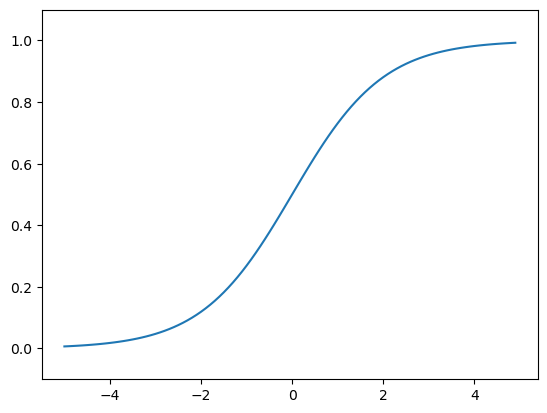

In [2]:
import numpy as np
import matplotlib.pylab as plt
#np.exp() y=e의 x승
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
X = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(X)
plt.plot(X, y)
plt.ylim(-0.1, 1.1)
plt.show()
#0,1이 아닌 연속적인 실수값을 출력함

##### ReLU(Rectified Linear Unit)함수: 입력이 0보다 크면 그대로 출력, 0 이하면 0 출력

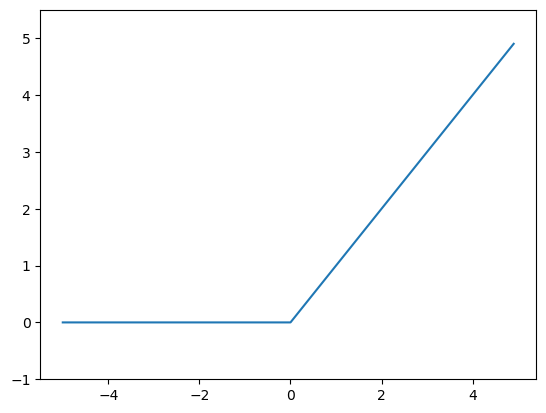

In [3]:
import numpy as np
import matplotlib.pylab as plt
def relu(x):
    return np.maximum(0, x)
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

##### tanh(Hyperbolic Tangent) 함수: 확장된 시그모이드 함수, -1~1 사이 출력

[-3.14159265 -2.57039399 -1.99919533 -1.42799666 -0.856798   -0.28559933
  0.28559933  0.856798    1.42799666  1.99919533  2.57039399  3.14159265]
[-0.99627208 -0.98836197 -0.96397069 -0.89125532 -0.69460424 -0.27807943
  0.27807943  0.69460424  0.89125532  0.96397069  0.98836197  0.99627208]


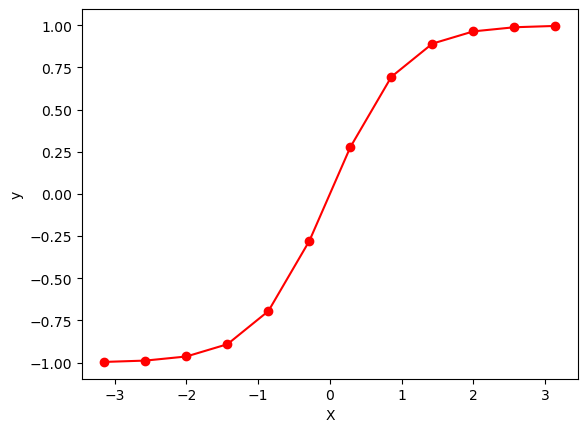

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-np.pi, np.pi, 12)
y = np.tanh(X)
print(X)
print(y)
plt.plot(X, y, c = 'r', marker = "o")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

##### 행렬의 곱셈

In [5]:
a=np.array([[1,2],[3,4]])
print(a.shape)
print(a)
b=np.array([[5,6],[7,8]])
print(b.shape)
print(b)
print(np.dot(a,b))

(2, 2)
[[1 2]
 [3 4]]
(2, 2)
[[5 6]
 [7 8]]
[[19 22]
 [43 50]]


In [6]:
a=np.array([[1,2,3],[4,5,6]])
print(a.shape)
print(a)
b=np.array([[1,2],[3,4],[5,6]])
print(b.shape)
print(b)
print(np.dot(a,b))

(2, 3)
[[1 2 3]
 [4 5 6]]
(3, 2)
[[1 2]
 [3 4]
 [5 6]]
[[22 28]
 [49 64]]


In [7]:
c=np.array([[1,2],[3,4]])
np.dot(a,c)
# 2행 3열 x 2행 2열 에러
#앞행렬의 열과 뒤 행렬의 행이 같아야 한다.

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

##### 항등함수

In [9]:
#신경망의 연산에는 행렬을 사용함
x=np.array([1, 0.5]) #가중치 weight 곱해지는 값/편향 bias 조절하는 값
#첫번째 은닉층
w1=np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) #가중치
b1=np.array([0.1, 0.2, 0.3]) #편향
a1=np.dot(x,w1)+b1 #첫번째 은닉층의 합계값/ X*weight+bias
z1=sigmoid(a1) #활성화함수
print(a1)
print(z1)
#두번째 은닉층의 작업
w2=np.array([[0.1, 0.4], [0.2, 0.5],[0.3, 0.6]]) #가중치
b2=np.array([0.1, 0.2]) #편향
a2=np.dot(z1,w2)+b2 #두번째 은닉층의 합계값
z2=sigmoid(a2) #활성화함수
print(a2)
print(z2)
#항등함수: 항상 성립하는 등식,집합 X의 원소와 이에 대응하는 집합 Y의 원소가 항상 같음
def identity_function(x): #항등함수
    return x
w3=np.array([[0.1, 0.3], [0.2, 0.4]])
b3=np.array([0.1, 0.2])
a3=np.dot(z2,w3)+b3
y=identity_function(a3) #출력층의 활성화함수로 항등함수를 사용
print(y)

#출력층의 활성화함수
#회귀:항등함수
#분류:소프트맥스

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]
[0.31682708 0.69627909]


##### 소프트맥스 함수

In [10]:
a=np.array([0.3,2.9,4.0])
exp_a=np.exp(a) #지수함수
print(exp_a)
sum_exp_a=np.sum(exp_a) #지수함수의 합계
print(sum_exp_a)
y=exp_a / sum_exp_a
print(y)

def softmax(a):
    exp_a=np.exp(a) #지수함수
    #print(exp_a)
    sum_exp_a=np.sum(exp_a) #지수함수의 합계
    #print(sum_exp_a)
    y=exp_a / sum_exp_a
    return y

a=np.array([0.3,2.9,4.0])
print(softmax(a))
#무한대 문제가 발생함
a=np.array([1000,1100,1200])
print(softmax(a))
# 큰 값을 입력하면 지수계산 문제로 무한대가 나오게 되어 오류가 발생함
a=np.array([1010,1000,900])
print(np.exp(a) / np.sum(np.exp(a)))
#a의 최대값
c=np.max(a)
#a에서 최대값을 뺀 값
print(a-c)
#무한대 문제가 해결됨
print(np.exp(a-c) / np.sum(np.exp(a-c)))

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]
[0.01821127 0.24519181 0.73659691]
[nan nan nan]
[nan nan nan]
[   0  -10 -110]
[9.99954602e-01 4.53978687e-05 1.68883521e-48]


C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11748\438480701.py:10: RuntimeWarning: overflow encountered in exp
  exp_a=np.exp(a) #지수함수
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11748\438480701.py:14: RuntimeWarning: invalid value encountered in true_divide
  y=exp_a / sum_exp_a
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11748\438480701.py:24: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a)))
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11748\438480701.py:24: RuntimeWarning: invalid value encountered in true_divide
  print(np.exp(a) / np.sum(np.exp(a)))


In [11]:
import numpy as np
#무한대 문제를 해결한 소프트맥스 함수
def softmax(a):
    c = np.max(a)
    exp_a=np.exp(a-c) #지수함수
    #print(exp_a)
    sum_exp_a=np.sum(exp_a) #지수함수의 합계
    #print(sum_exp_a)
    y=exp_a / sum_exp_a
    return y
    
a=np.array([0.3,2.9,4.0])
print(softmax(a))
#무한대 문제가 해결됨
a=np.array([1000,1100,1200])
print(softmax(a))

[0.01821127 0.24519181 0.73659691]
[1.38389653e-87 3.72007598e-44 1.00000000e+00]


In [12]:
#소프트맥스 함수의 총합은 1
np.sum(softmax(a))

1.0

In [13]:
print(softmax(a))
#소프트맥스 함수 출력의 총합은 1이 됨
#따라서 소프트맥스 함수의 출력결과를 확률로 해석할 수 있음
s=np.sum(softmax(a))
print(s)
#확률이 가장 높은 값의 인덱스
idx=np.argmax(softmax(a))
print(idx)
#확률이 가장 높은 값
print(a[idx])

[1.38389653e-87 3.72007598e-44 1.00000000e+00]
1.0
2
1200


- hidden layer: relu(일반적인 신경망), tanh(순환 신경망-순서가 있는 데이터)
- output layer: sigmoid(이진분류), softmax(다분류), linear(회귀분석)